## About Dataset

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors.

### How to get this dataset?
Visit main site of [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset) to download data. In this dataset, we have 3 files: hour.csv, day.csv and Readme.txt.

### Dataset characteristics
Both **hour.csv** and **day.csv** have the following fields, except hr which is not available in **day.csv**

- **instant**: record index
- **dteday**: date
- **season**: season (1:springer, 2:summer, 3:fall, 4:winter)
- **yr**: year (0: 2011, 1:2012)
- **mnth**: month ( 1 to 12)
- **hr**: hour (0 to 23)
- **holiday**: weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday**: day of the week
- **workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.
- **weathersit**:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: Normalized temperature in Celsius. The values are divided to 41 (max)
- **atemp**: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- **hum**: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered
In this analysis report, we just use hour.csv, because this data file contains information of day.csv

What can we explore from this dataset?
The difference in demand for bicycle rental between registerd users and casual users?
How does the demand for bike rental change over time?
How does the demand for bike rental change through what time of the day?
What is the demand for bike rental on holidays?
How do weather conditions affect the demand for bike rental?

# Import necessary library

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Data

In [13]:
# Initial data directory
data_dir = 'data/Bike-Sharing-Dataset'

In [14]:
data = pd.read_csv(os.path.join(data_dir, 'hour.csv'), delimiter=',')

# Take a look at dataset

In [15]:
# Get first 5 rows of the dataset
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
# check null values in data
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the dataset

In [17]:
# get statistics on the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


# Process data

In [18]:
# Remove unnecessary column
data.drop('instant',  axis=1, inplace=True)

In [19]:
# Copy data to new one
preprocess_data = data.copy()

In [20]:
# Encode the temporal features into a more human-readable format.
# transform seasons
seasons_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
preprocess_data['season'] = preprocess_data['season'].apply(lambda x: seasons_mapping[x])

# transform yr
year_mapping = {0: 2011, 1: 2012}
preprocess_data['yr'] = preprocess_data['yr'].apply(lambda x: year_mapping[x])

# transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
preprocess_data['weekday'] = preprocess_data['weekday'].apply(lambda x: weekday_mapping[x])

# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocess_data['weathersit'] = preprocess_data['weathersit'].apply(lambda x: weather_mapping[x])

# transform hum and windspeed
preprocess_data['hum'] = preprocess_data['hum']*100
preprocess_data['windspeed'] = preprocess_data['windspeed']*67

In [22]:
# Observe new data
preprocess_data

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,winter,2011,1,0,0,Saturday,0,clear,0.24,0.2879,81.0,0.0000,3,13,16
1,2011-01-01,winter,2011,1,1,0,Saturday,0,clear,0.22,0.2727,80.0,0.0000,8,32,40
2,2011-01-01,winter,2011,1,2,0,Saturday,0,clear,0.22,0.2727,80.0,0.0000,5,27,32
3,2011-01-01,winter,2011,1,3,0,Saturday,0,clear,0.24,0.2879,75.0,0.0000,3,10,13
4,2011-01-01,winter,2011,1,4,0,Saturday,0,clear,0.24,0.2879,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,winter,2012,12,19,0,Monday,1,cloudy,0.26,0.2576,60.0,11.0014,11,108,119
17375,2012-12-31,winter,2012,12,20,0,Monday,1,cloudy,0.26,0.2576,60.0,11.0014,8,81,89
17376,2012-12-31,winter,2012,12,21,0,Monday,1,clear,0.26,0.2576,60.0,11.0014,7,83,90
17377,2012-12-31,winter,2012,12,22,0,Monday,1,clear,0.26,0.2727,56.0,8.9981,13,48,61


# Explore Data Analysis

## 1. Registered versus Casual Use Analysis

In [23]:
# Let's check whether total number of rides is equal to the sum of registered and casual ones
assert (preprocess_data.casual + preprocess_data.registered == preprocess_data.cnt).all(),\
       'Sum of casual and registered rides not equal to total number of rides'

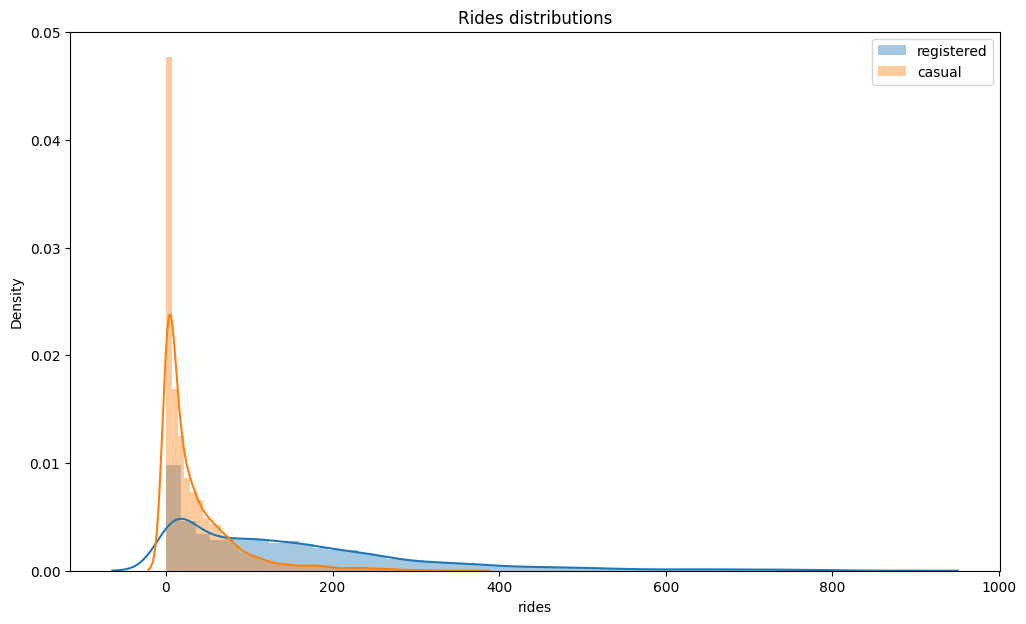

In [24]:
# plot distributions of registered vs casual rides
fig = plt.figure(figsize=[12,7])
sns.distplot(preprocess_data['registered'], label='registered')
sns.distplot(preprocess_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.title("Rides distributions");

We can easily see that registered users perform way more rides than casual ones. Furthermore, we can see that the two distributions are skewed to the right, meaning that, for most of the entries in the data, zero or a small number of rides were registered (think, for example, of overnight rides). Finally, every entry in the data has quite a large number of rides (that is, higher than 800).


### How does the demand for bike rental change over time?

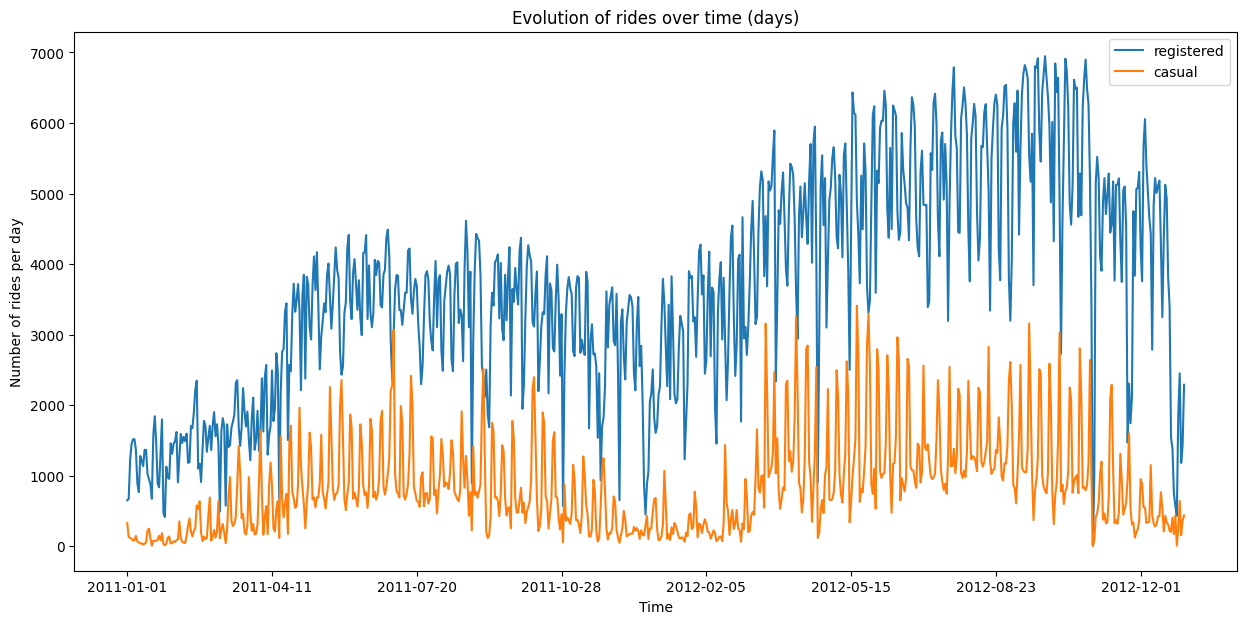

In [34]:
# plot evolution of rides over time (days)
plot_data = preprocess_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(15,7))
ax.set_xlabel("Time")
ax.set_ylabel("Number of rides per day")
plt.title("Evolution of rides over time (days)");

We can see, the number of registered rides is always above and significantly higher than the number of casual rides per day. Furthermore, we can observe that during winter, the overall number of rides decreases (which is totally in line with our expectations, as bad weather and low temperatures have a negative impact on ride sharing services)

### Bike rental demand of users over the years and over the months

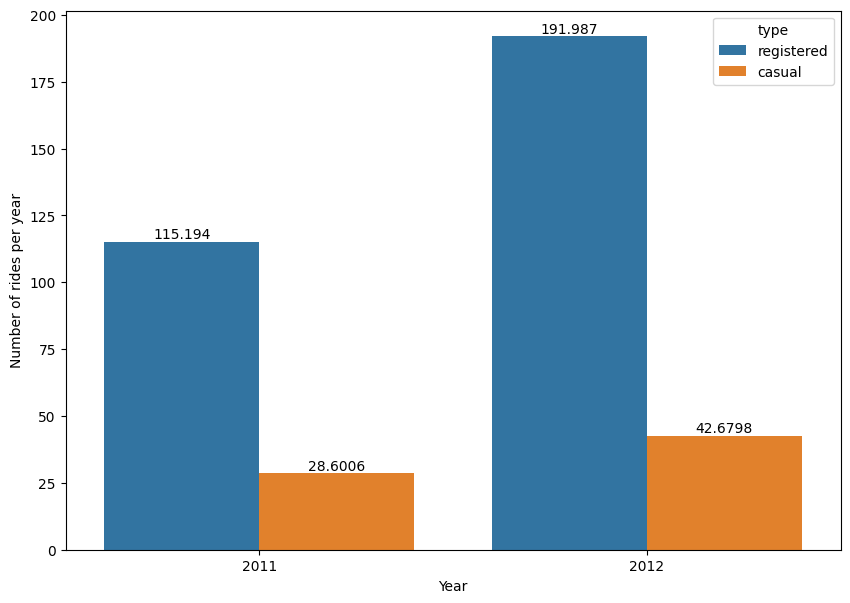

In [42]:
# select relevant columns
plot_data = preprocess_data[['yr', 'registered', 'casual']]
# Transform the data into a format, in number of entries are computed as count,
# for each distinct hr, weekday and type (registered or casual)
plot_data = plot_data.melt(id_vars='yr', var_name='type', value_name='count')
# grouped barplot
fig = plt.figure(figsize=[10,7])
ax = sns.barplot(x="yr", y="count", hue="type", data=plot_data, ci=None)
# Customize the axes and title
ax.set_xlabel("Year")
ax.set_ylabel("Number of rides per year")
for container in ax.containers:
    ax.bar_label(container);

The number of trips in 2012 was significantly higher than in 2011. Especially, the number of registered rides in 2012 was 66% higher than in 2011.

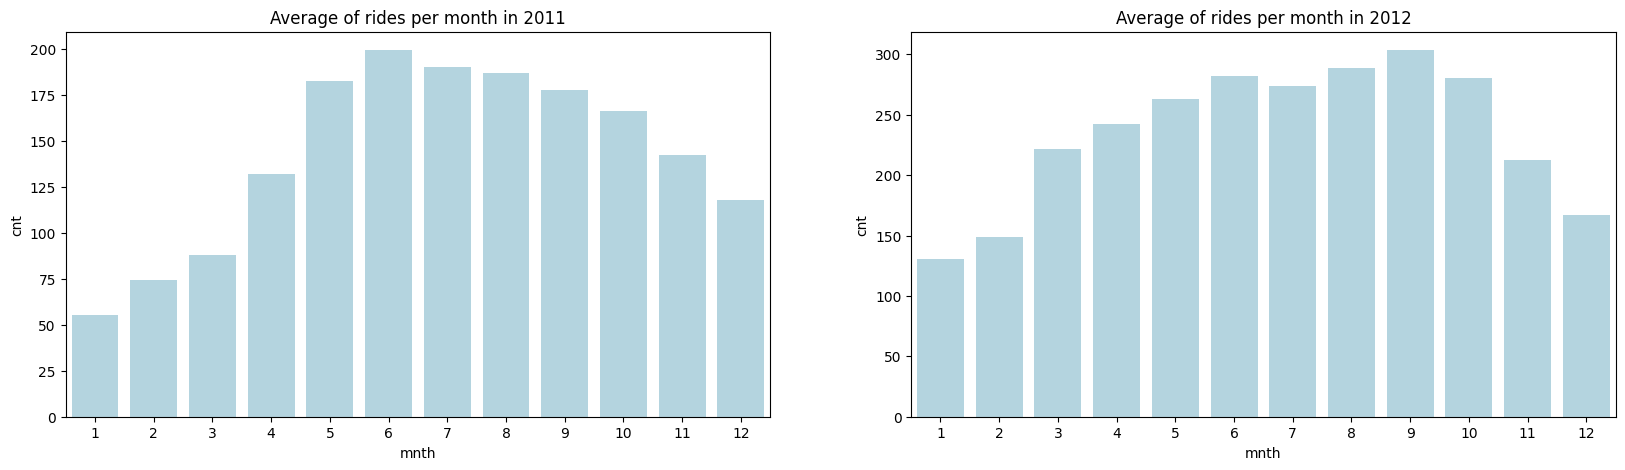

In [64]:
# select relevant columns
plot_data = preprocess_data[['yr', 'mnth', 'cnt']]
# Average of rides per month
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
# Average of rides per month
sns.barplot(ax=axes[0], x='mnth',y='cnt',data=preprocess_data[preprocess_data['yr']==2011].groupby('mnth')['cnt'].mean().reset_index(), color="lightblue")
sns.barplot(ax=axes[1], x='mnth',y='cnt',data=preprocess_data[preprocess_data['yr']==2012].groupby('mnth')['cnt'].mean().reset_index(), color="lightblue")

axes[0].set_title('Average of rides per month in 2011')
axes[1].set_title('Average of rides per month in 2012')

ax.bar_label(ax.containers[0]);

Users have the highest demand in the middle months of the years, from May to October. And gradually decrease at the beginning of the year and at the end of the year. It can be realized that, in winter, users have less demand than in the rest of the seasons.

### How does the demand for bike rental change through what time of the day?

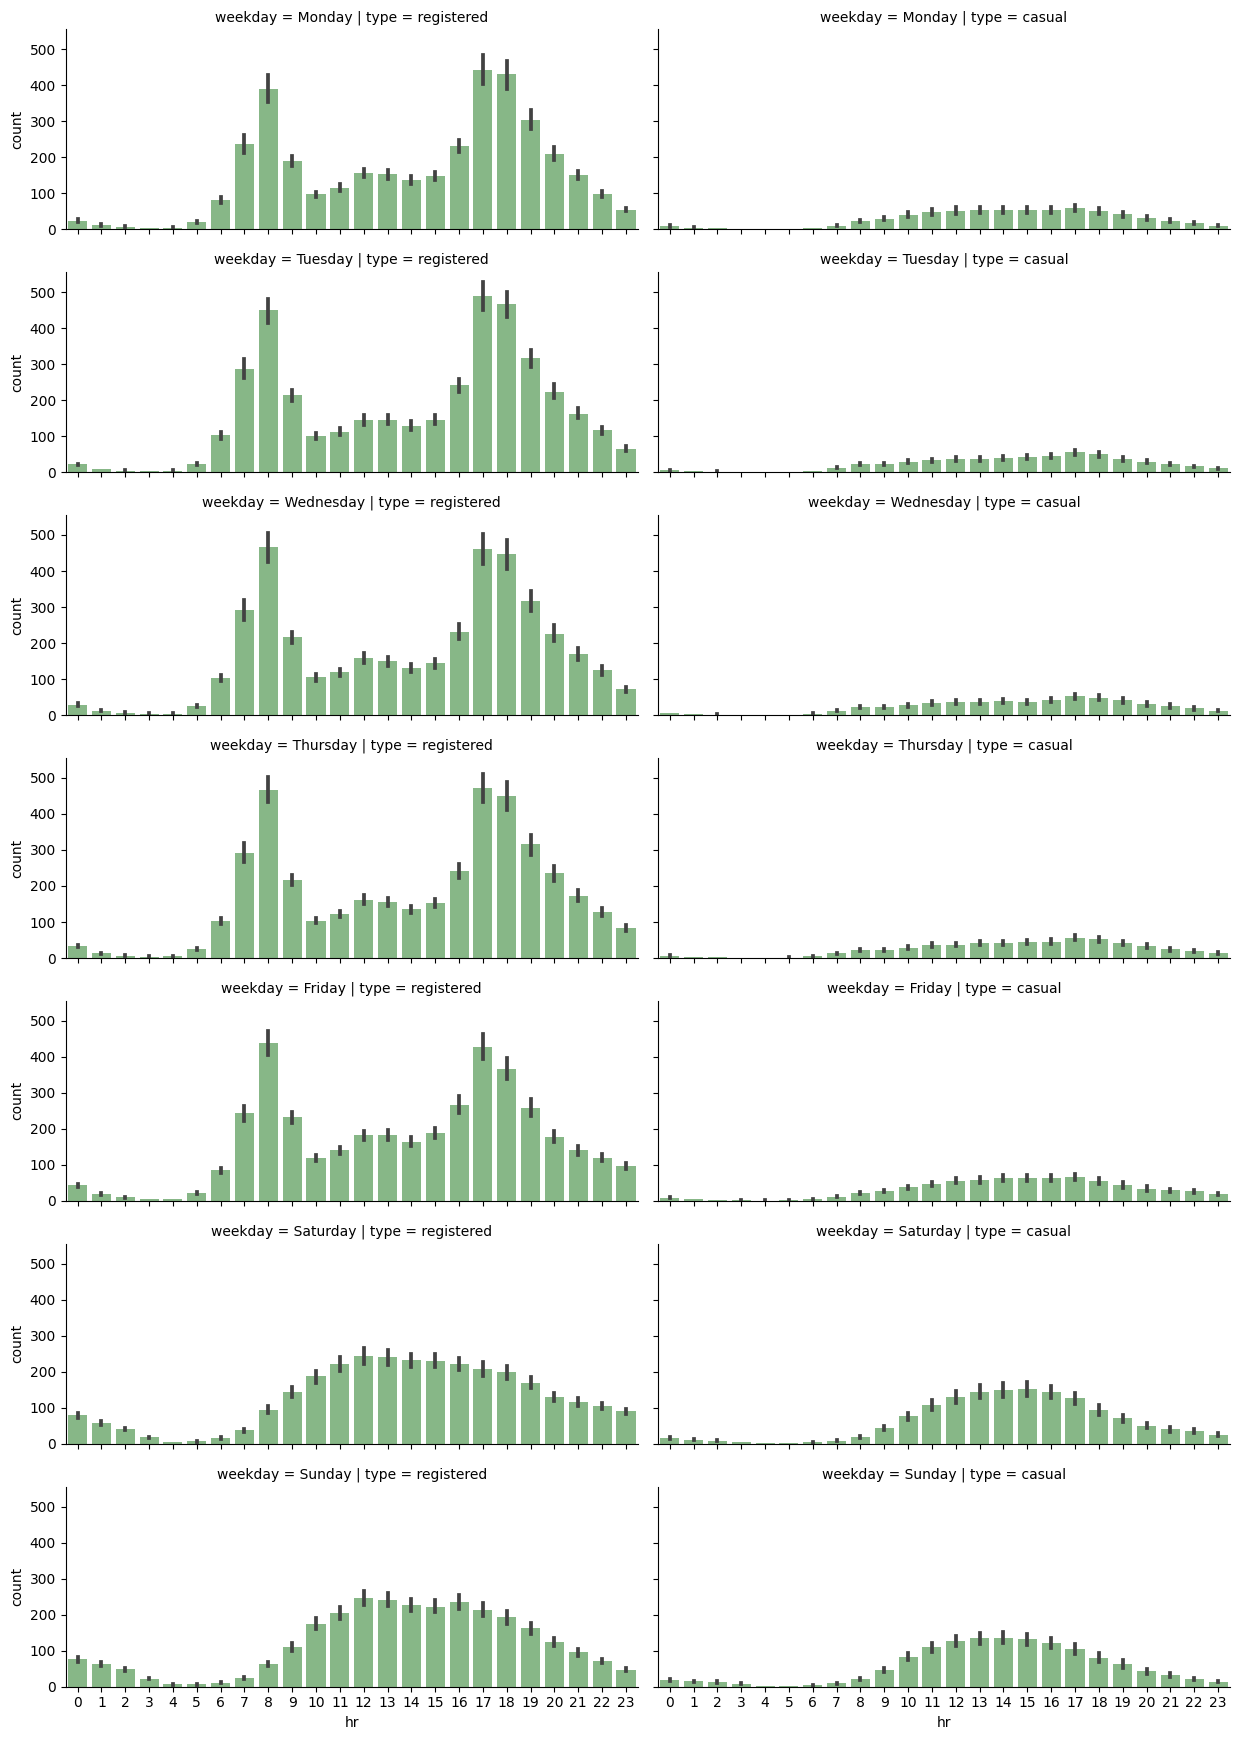

In [70]:
# select relevant columns
plot_data = preprocess_data[['hr', 'weekday', 'registered', 'casual']]

# Transform the data into a format, in number of entries are computed as count,
# for each distinct hr, weekday and type (registered or casual)

plot_data = plot_data.melt(id_vars=['hr', 'weekday'], var_name='type', value_name='count')

# Create FacetGrid object, in which a grid plot is produced. 
# As columns, we have the various days of the week. As rows, the different types (registered and casual)
grid = sns.FacetGrid(plot_data, row='weekday', 
                     col='type', height=2.5, aspect=2.5, 
                     row_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                'Friday', 'Saturday', 'Sunday'])
# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5, color ='green');

We can note that on working days, the highest number of rides for registered users takes place around 8 AM and at 6 PM. This is totally in line with our expectations, as it is likely that most registered users use the bike sharing service for commuting. On the other hand, the casual usage of bike sharing services on working days is quite limited, as the plot shows.

During the weekend, we can see that ride distributions change for both casual and registered users. Still, registered rides are more frequent than casual ones, but both the distributions have the same shape, almost uniformly distributed between the time interval of 11 AM to 6 PM.

As a conclusion, we could claim that most of the usage of bike sharing services occurs during working days, right before and right after the standard working time (that is, 9 to 5)



### How do seasons impact bike rental demand?

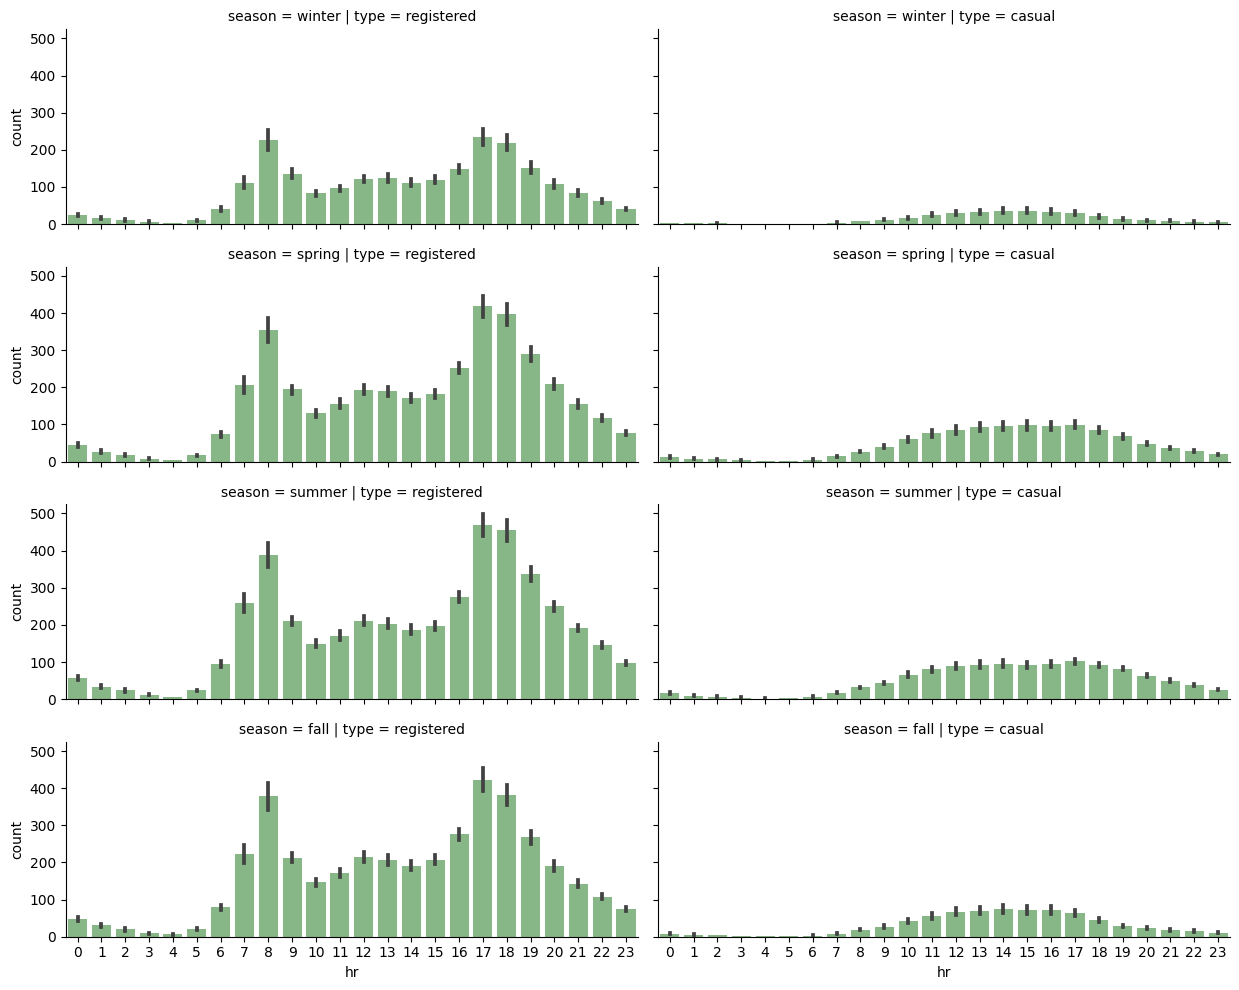

In [71]:
# select subset of the data
plot_data = preprocess_data[['hr', 'season', 'registered', 'casual']]
# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['hr', 'season'], var_name='type', value_name='count')
# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season', 
                     col='type', 
                     height=2.5, aspect=2.5, 
                     row_order=['winter', 'spring', 'summer', 'fall'])

# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5,  color ='green');

As can be seen in the plot, while each season has a similar graph shape, the count is lower for the winter graph. So there are fewer rides (registered and casual) during winter. This makes sense, as fewer rides are likely to occur when the weather conditions are poor.

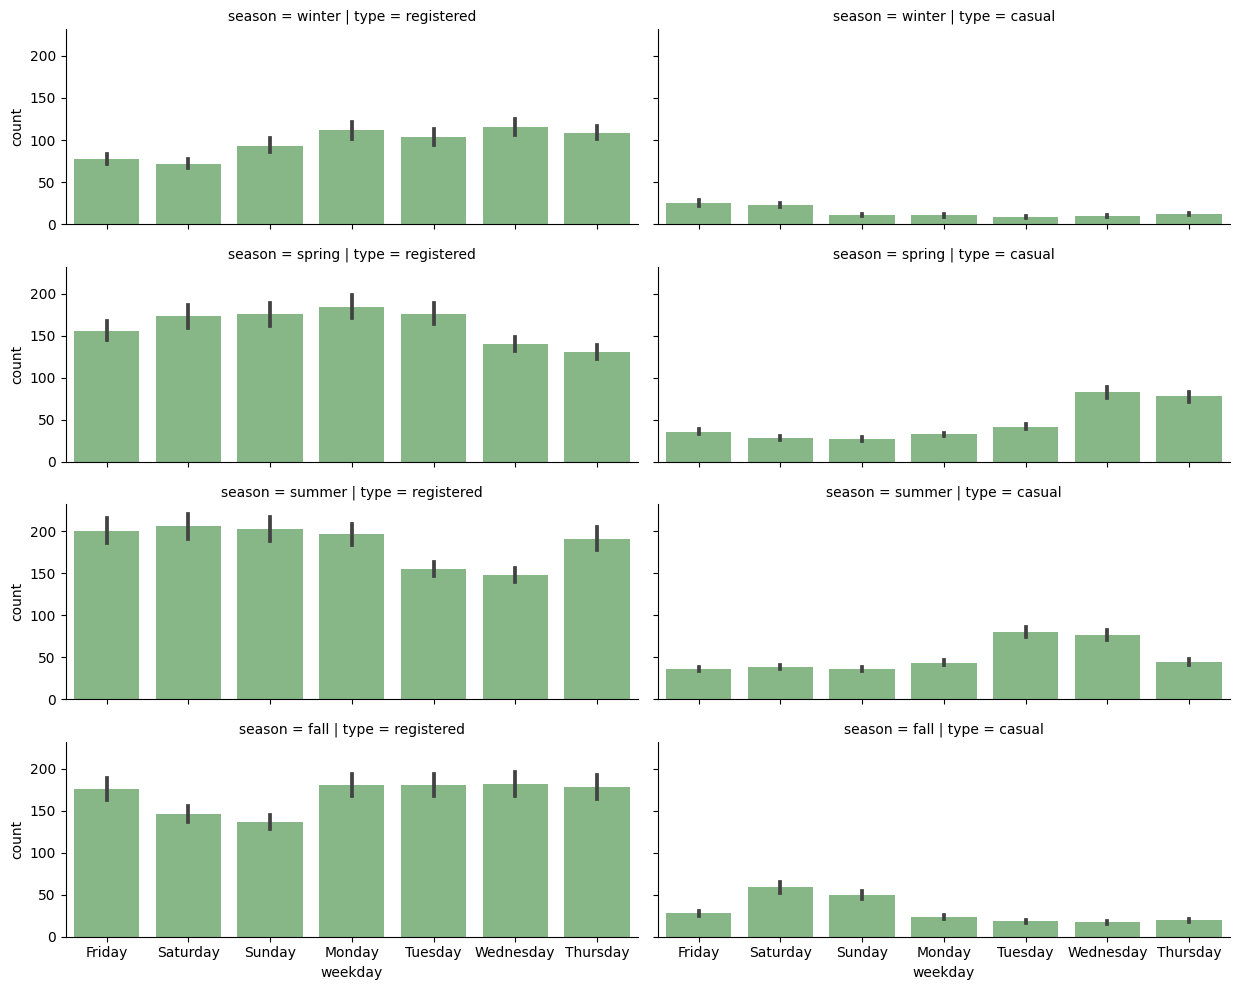

In [72]:
# select subset of the data
plot_data = preprocess_data[['weekday', 'season', 'registered', 'casual']]
# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['weekday', 'season'], var_name='type', value_name='count')
# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season', 
                     col='type', 
                     height=2.5, aspect=2.5, 
                     row_order=['winter', 'spring', 'summer', 'fall'])

# apply plotting function to each element in the grid
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5,  color ='green');

There is a decreasing number of registered rides over the weekend (compared to the rest of the week), while the number of casual rides increases. This could enforce our initial hypothesis, that is, that registered customers mostly use the bike sharing service for commuting (which could be the reason for the decreasing number of registered rides over the weekend), while casual customers use the service occasionally over the weekend.

### What is the demand for bike rental on holidays?

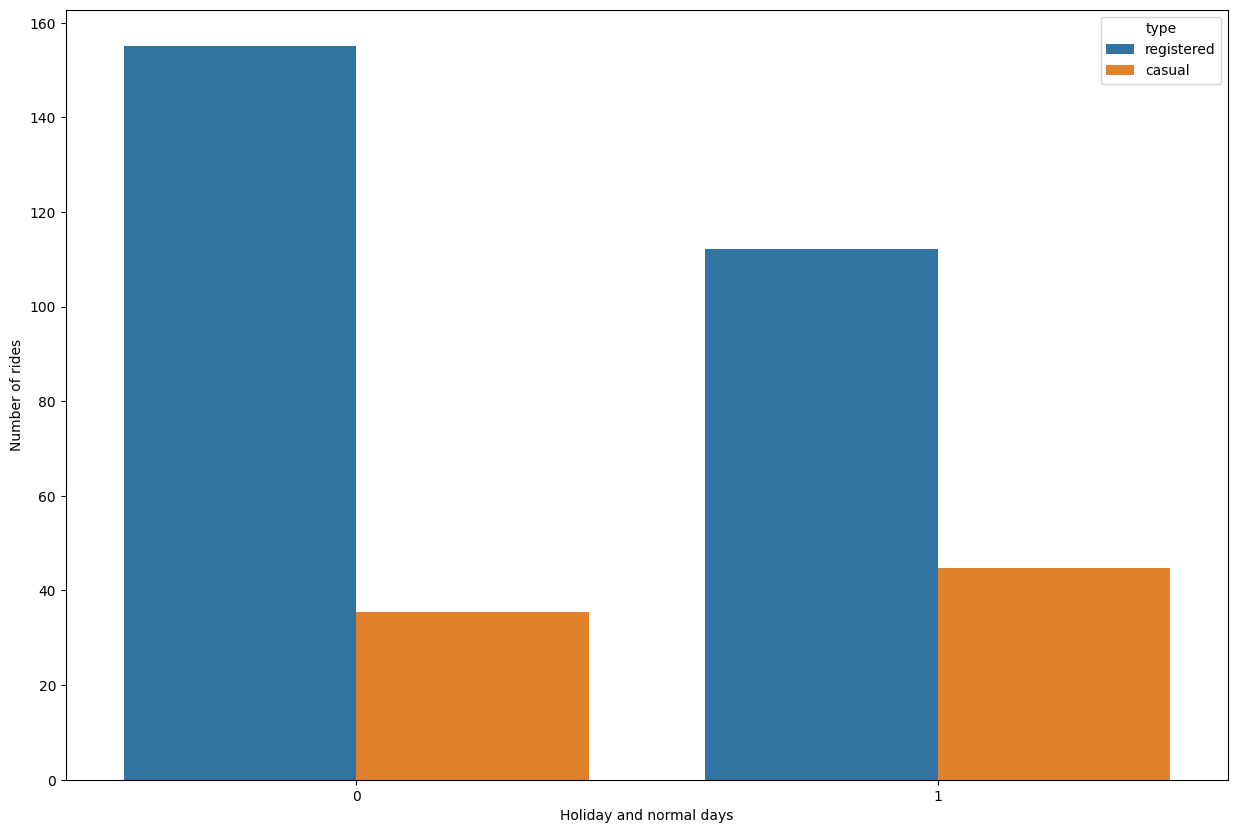

In [73]:
# select relevant columns
plot_data = preprocess_data[['holiday', 'registered', 'casual']]
# Transform the data into a format, in number of entries are computed as count,
# for each distinct hr, weekday and type (registered or casual)
plot_data = plot_data.melt(id_vars='holiday', var_name='type', value_name='count')
# grouped barplot
fig = plt.figure(figsize=[15,10])
ax = sns.barplot(x="holiday", y="count", hue="type", data=plot_data, ci=None)
# Customize the axes and title
ax.set_xlabel("Holiday and normal days")
ax.set_ylabel("Number of rides");

A special thing is that the demand for bike rental on holidays is much lower than on normal days. This shows, when users rent bicycles mainly to go to work. Keep looking at the bike rental demand chart on the working day and we will have the answer.

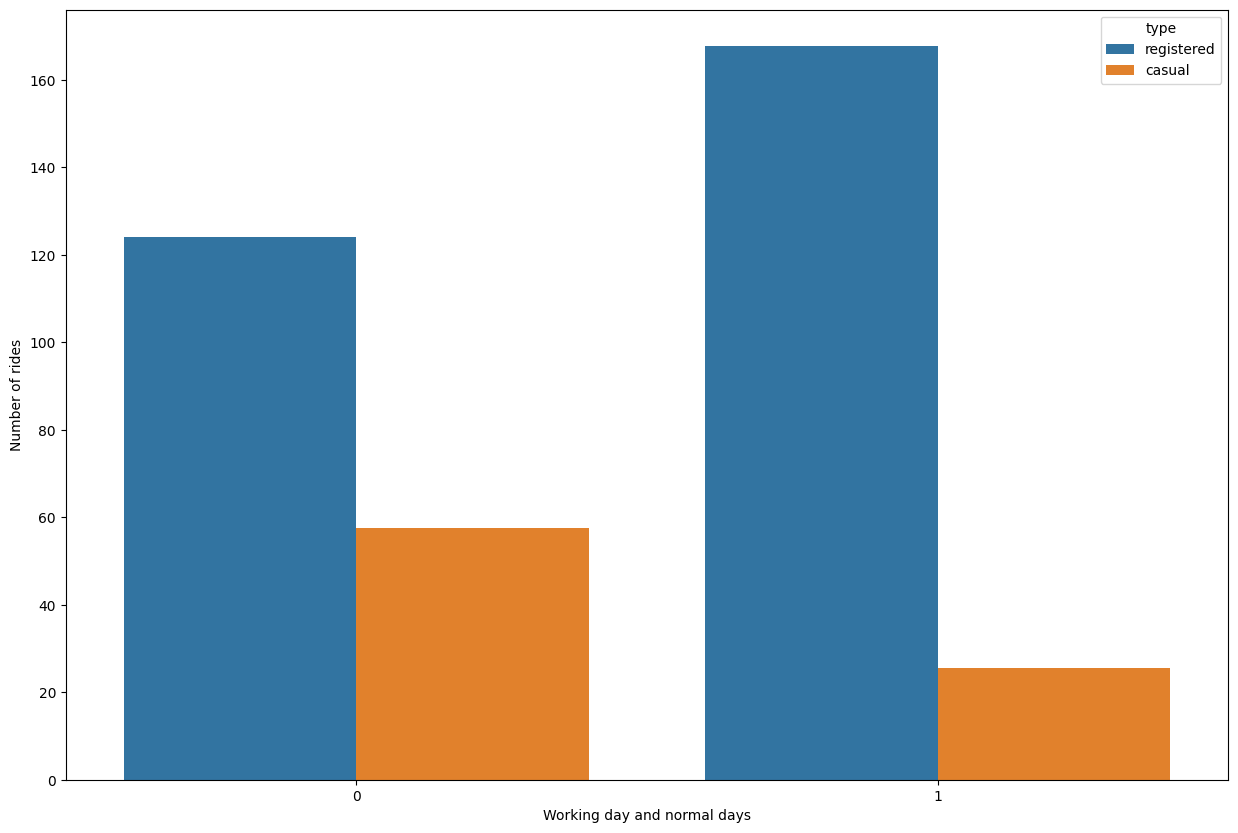

In [74]:
# select relevant columns
plot_data = preprocess_data[['workingday', 'registered', 'casual']]
# Transform the data into a format, in number of entries are computed as count,
# for each distinct hr, weekday and type (registered or casual)
plot_data = plot_data.melt(id_vars='workingday', var_name='type', value_name='count')
# grouped barplot
fig = plt.figure(figsize=[15,10])
ax = sns.barplot(x="workingday", y="count", hue="type", data=plot_data, ci=None)
# Customize the axes and title
ax.set_xlabel("Working day and normal days")
ax.set_ylabel("Number of rides");

Wow, so the statement about users renting bikes mainly for commuting is correct.

### How do weather situations affect the demand for bike rental?

**weathersit**: This is a categorical variable representing the current weather situation. We encoded this variable with the following four values:

- clear: Clear, Few clouds, Partly cloudy, Partly cloudy
- cloudy: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- light_rain_snow: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- heavy_rain_snow: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Let's See the difference in bike rental demand across weather conditions.

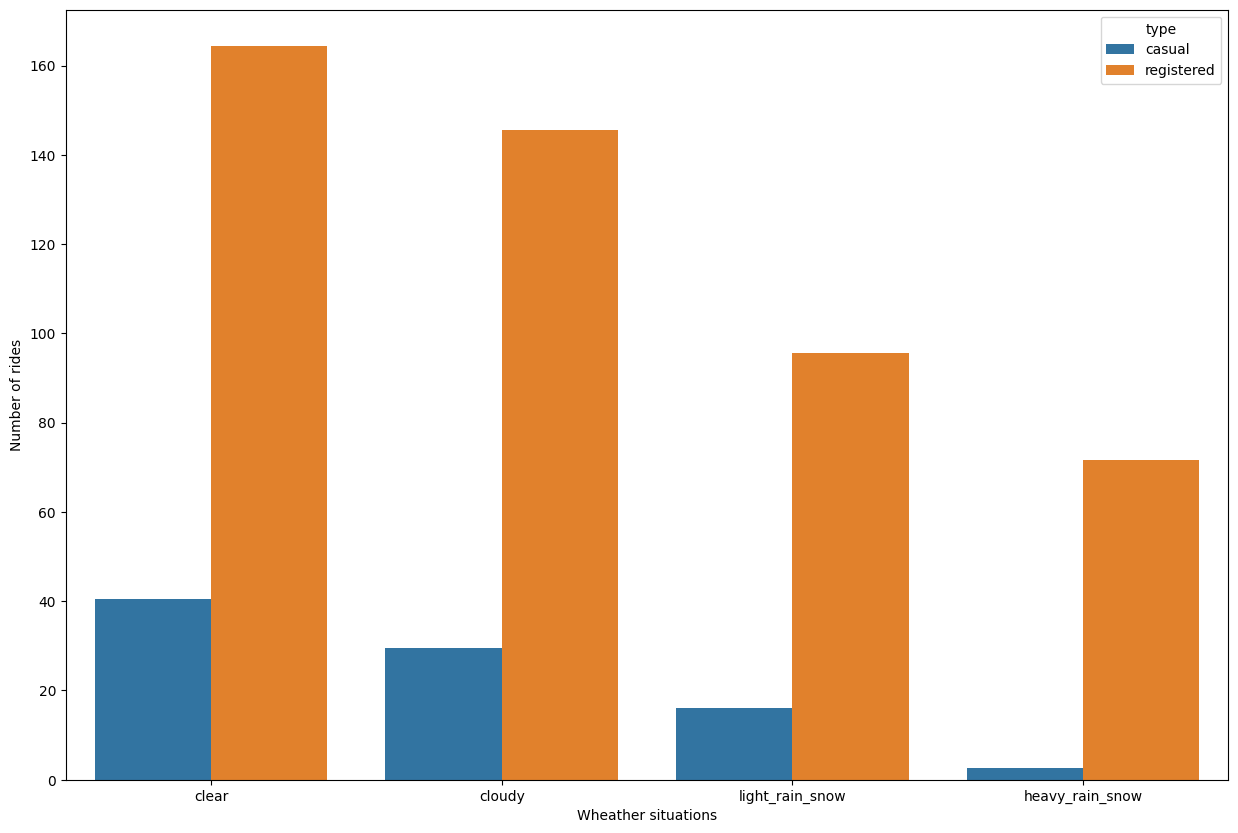

In [79]:
# select relevant columns
plot_data = preprocess_data[['weathersit','casual','registered']]
# Transform the data into a format, in number of entries are computed as count,
# for each distinct hr, weekday and type (registered or casual)
plot_data = plot_data.melt(id_vars='weathersit', var_name='type', value_name='count')
# grouped barplot
fig = plt.figure(figsize=[15,10])
ax = sns.barplot(x="weathersit", y="count", hue="type", data=plot_data, ci=None)
# Customize the axes and title
ax.set_xlabel("Wheather situations")
ax.set_ylabel("Number of rides");

We can clearly see the change in bike rental demand through weather conditions. Customers (registerd/casual) have high rental demand on clear days and limit cycling on bad weather days.

Let's explore in detail how weather values affect car rental demand?

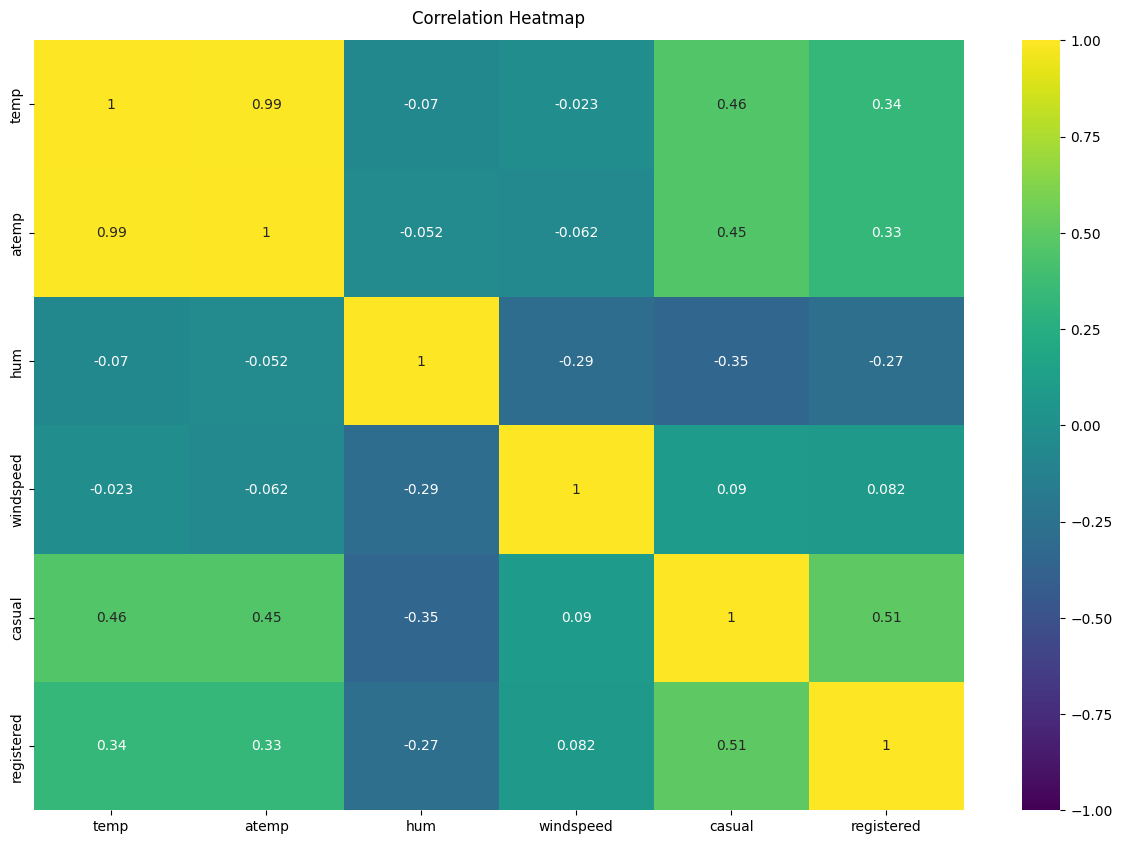

In [81]:
plot_data = preprocess_data[['temp','atemp','hum','windspeed','casual','registered']]
# Plot
plt.figure(figsize=(15,10))
corr_mat = sns.heatmap(plot_data.corr(), vmin=-1, vmax=1, annot=True, cmap='viridis')
corr_mat.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We can observe that higher temperatures have a positive impact on the number of rides (the correlation between registered/casual rides and temp is 0.34 and 0.46, respectively, and it's a similar case for atemp).

The same pattern can be observed in which the humidity level has a negative correlation with both types of rides (-0.27 for registered and -0.35 for casual). This means that with a high level of humidity (mist or rain), customers will tend not to use the bike sharing service.

There is minimal correlation between the number of rides and the wind speed (a weak positive correlation)

## Conclusion
1. Through the charts, they can be seen that more and more people are interested in bike rental services
2. Holidays do not affect the demand for bike rental of users, and the truth is that user's rent bikes mainly to go to work. Therefore, on working days, the demand will increase and mainly focus on around 8 AM and at 6 PM.
3. Winter is the season with the lowest demand.